# Puzzle rush
Hi, I'm Masha and this is my code that collects and analyzes my Puzzle Rush progress. Puzzle Rush is a puzzle solving mode on `chess.com` where one has to solve as many chess puzzles as possible up to three mistakes. There are three time controls—3 mins, 5 mins and no time. I enjoy this mode very much and play it a lot. My current record (02.03.25) for 3 mins is 23 puzzles and I want to improve. To see my progress, I create this script for storing and analyzing my progress. 

The initial idea was to simply scrap my data from `chess.com` API, but it's unfortunately not enough for me. It only shows this much. 

In [4]:
import requests 
from pprint import pprint
headers = {
    "User-Agent": "PyCharm 2024.1.1 (Professional Edition), "
                  "(maria.onoeva@gmail.com)"
}

url ="https://api.chess.com/pub/player/xoroshulia/stats"
url_req = requests.get(url, headers=headers)
pprint(url_req.json())

{'chess_blitz': {'best': {'date': 1692653200,
                          'game': 'https://www.chess.com/game/live/115556343103',
                          'rating': 747},
                 'last': {'date': 1740911160, 'rating': 149, 'rd': 93},
                 'record': {'draw': 0, 'loss': 13, 'win': 3}},
 'chess_daily': {'best': {'date': 1717835845,
                          'game': 'https://www.chess.com/game/daily/653298061',
                          'rating': 1048},
                 'last': {'date': 1729955915, 'rating': 1048, 'rd': 218},
                 'record': {'draw': 0,
                            'loss': 0,
                            'time_per_move': 31134,
                            'timeout_percent': 0,
                            'win': 5}},
 'chess_rapid': {'best': {'date': 1644312554,
                          'game': 'https://www.chess.com/game/live/128116764579',
                          'rating': 952},
                 'last': {'date': 1736244842, 'rating': 739, '

<code>puzzle_rush</code> is second from the bottom, and it's not detailed enough for me. It stores only one last attempt and the highest just for one time control (this is going to update every time I re-run this code). 

So my idea is to manually document all attempts. I have already begun, and it is loaded here to `data/puzzle_rush.csv`. It contains 5 columns--Date, Format, Solved, Time, Errors. The idea is to enter from the command line all this info after each attempt. 

Below is the code that requires an input from the command line. In `data`, I enter three data points—number of solved puzzles, time left in seconds, number of errors. It is then stored with time of solving, 3-minute mode in `data_write`. A new line is then added to a different csv file, e.g., the data for March 2025 is stored in `puzzle_rush_202503.csv`. 

In [13]:
from datetime import datetime
import csv 

data = input('Enter you result (solved puzzles, time left, errors): ')
data_write = datetime.today().strftime('%Y-%m-%d %H:%M:%S') + ',3,' + data

csv_file = 'data/puzzle_rush_202504.csv'

with open(csv_file, 'a', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(data_write.split(','))
    lines = csv.reader(csvfile)
    

These lines print output from `puzzle_rush_202503.csv`, if necessary.

In [ ]:
# with open(test_file, 'r') as csvfile:
#     content = csv.reader(csvfile, delimiter=',')
#     for row in content:
#         print(row)

Now I create a plot with all my attempts. It takes info from the csv file and draws a plot using `matplotlib`.

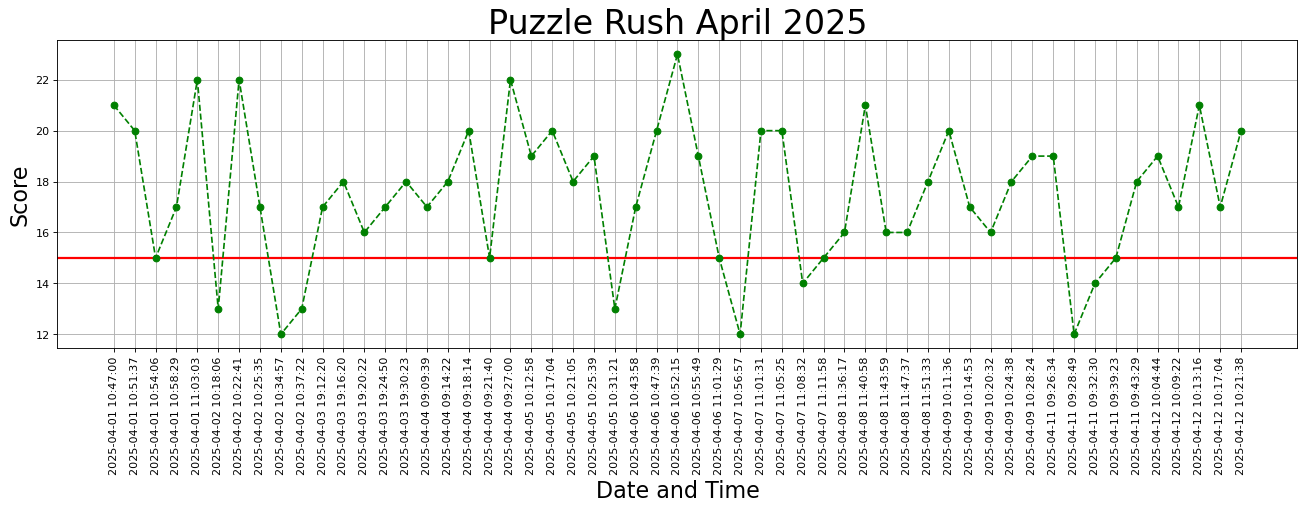

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 5), dpi=80)

date_time = []
score = []

with open(csv_file, 'r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        date_time.append(row[0])
        score.append(int(row[2]))

# cosmetics
plt.title("Puzzle Rush April 2025", fontsize=30)
plt.xlabel("Date and Time", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.xticks(rotation=90)
plt.grid()

# draws one red line on y = 15 
plt.axhline(linewidth=2, color='r', y=15)

# data for the plot
plt.plot(date_time, score, color = 'g', linestyle = 'dashed', marker = 'o')

plt.savefig('data/pics/puzzle_rush_202504.png', bbox_inches='tight')
plt.show() 

On the x-axis, there is the date and time of solving, on the y-axis, numbers of solved puzzles per one attempt. The red line goes through 15 puzzles, and it is the score I do not want to go under. 

to do: 
- if no error, make a star instead of the dot
- 5 puzzle rushes a day
- try to have 0 sec time at the end 
- slow down when errors 
- добавить время и безошибочные попытки
- make a global file with stat for each month

### Pandas stat

In [66]:
import pandas as pd

puzzle_rush = pd.read_csv('data/puzzle_rush_202503.csv')
puzzle_rush.columns = ['Timestamp', 'Mode', 'Score', 'TimeLeft', 'Errors']

puzzle_rush.head()

,Timestamp,Mode,Score,TimeLeft,Errors
0,2025-03-03 10:41:13,3,20,0,3
1,2025-03-03 10:45:12,3,14,75,3
2,2025-03-04 10:42:08,3,18,52,3
3,2025-03-04 10:46:30,3,17,0,3
4,2025-03-04 10:49:29,3,13,66,3


In [62]:
print(puzzle_rush[['Score', 'Errors', 'TimeLeft']].describe())

           Score     Errors    TimeLeft
count  73.000000  73.000000   73.000000
mean   16.945205   2.260274   20.863014
std     2.966903   0.943213   29.871166
min     9.000000   0.000000    0.000000
25%    15.000000   2.000000    0.000000
50%    17.000000   3.000000    0.000000
75%    19.000000   3.000000   39.000000
max    22.000000   3.000000  108.000000


In [73]:
zero_time = puzzle_rush[(puzzle_rush['TimeLeft'] == 0)]
print(f"Zero seconds left: {len(zero_time)} out of {len(puzzle_rush['Timestamp'])} "
      f"({len(zero_time)/len(puzzle_rush['Timestamp'])*100:.2f}%)")

Zero seconds left: 38 out of 73 (52.05%)


In [75]:
under_15 = puzzle_rush[(puzzle_rush['Score'] <= 15)]
print(f"Below 15 score red line: {len(under_15)} out of {len(puzzle_rush['Timestamp'])} "
      f"({len(under_15)/len(puzzle_rush['Timestamp'])*100:.2f}%)")

Below 15 score (red line): 21 out of 73 (28.77%)


In [76]:
zero_time_no_error = puzzle_rush[(puzzle_rush['TimeLeft'] == 0) & (puzzle_rush['Errors'] == 0)]
print(f"Zero seconds left and zero errors: {len(zero_time_no_error)} out of {len(puzzle_rush['Timestamp'])} "
      f"({len(zero_time_no_error)/len(puzzle_rush['Timestamp'])*100:.2f}%)")

Zero seconds left and zero errors: 4 out of 73 (5.48%)
